In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4
import numpy as np
import pymc3 as pm
from pymc3 import Model, Normal, Slice, sample, traceplot
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arviz
from scipy.stats import bernoulli
from pymc3.distributions import Interpolated

1(a)

In [ ]:
def sampler(p):
     r = bernoulli.rvs(p, size=4000)
     return r

In [ ]:

A=np.array(sampler(0.6))
print(A)

[0 1 1 ... 1 1 1]


In [ ]:
def no_of_heads(n):
    sum=0
    for i in range(n):
        sum=sum+A[i]
    return sum

In [ ]:
alphas = [1,2,4,4]
betas = [1,4,4,2]
size = [0,1,2,3,4,100,1000,2000,4000]



1(b)

Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:01<00:00, 7743.94it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:01<00:00, 6789.10it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:01<00:00, 7206.05it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:01<00:00, 9653.92it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:01<00:

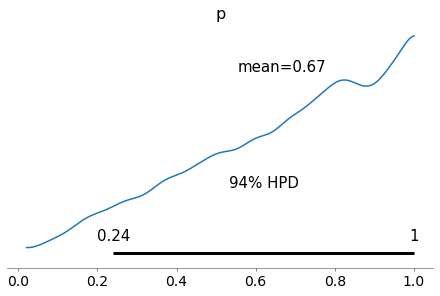

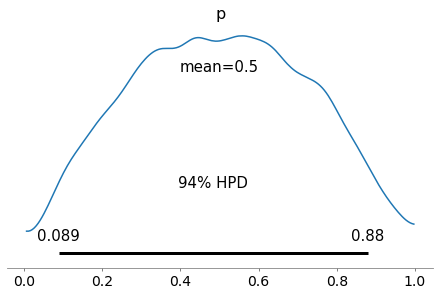

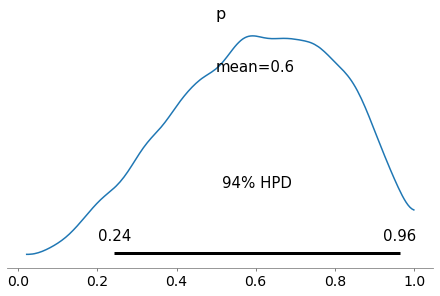

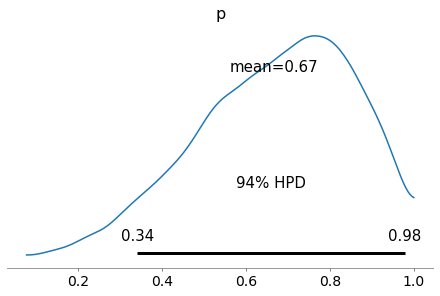

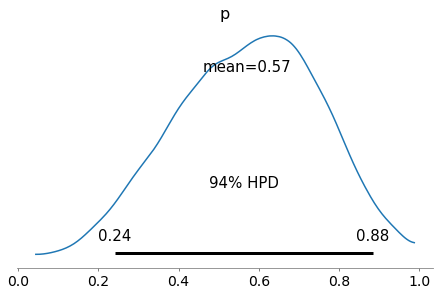

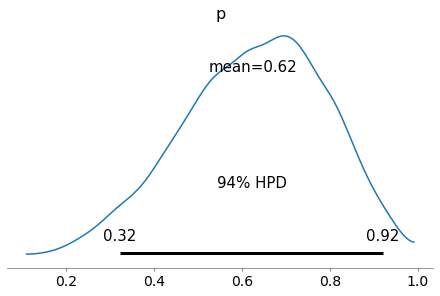

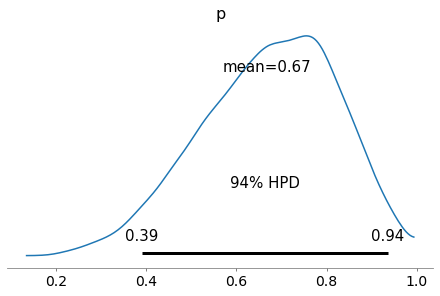

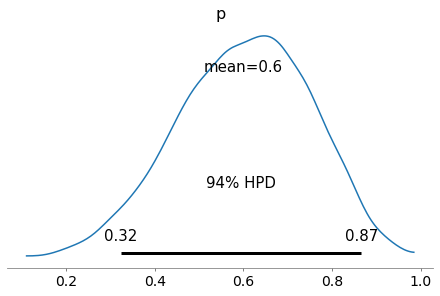

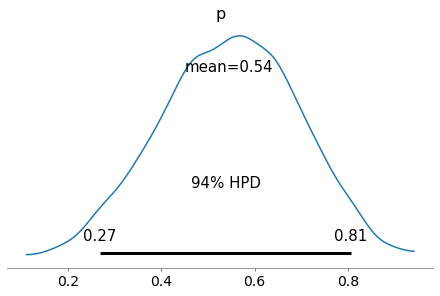

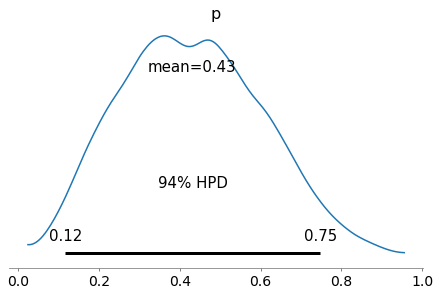

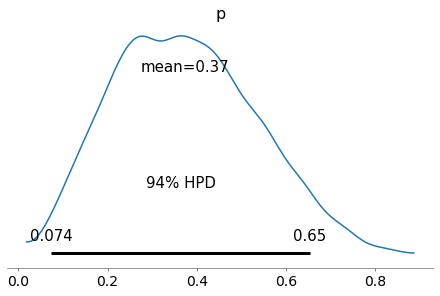

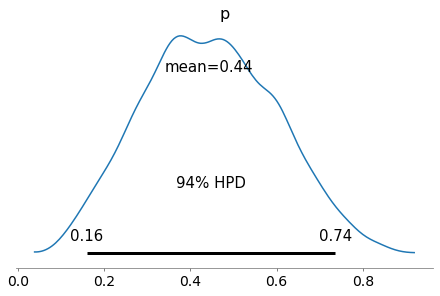

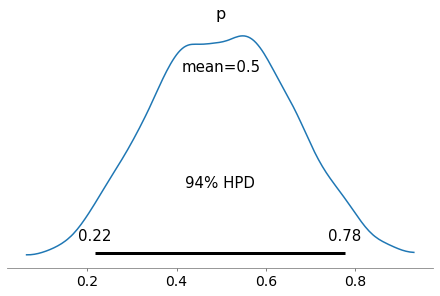

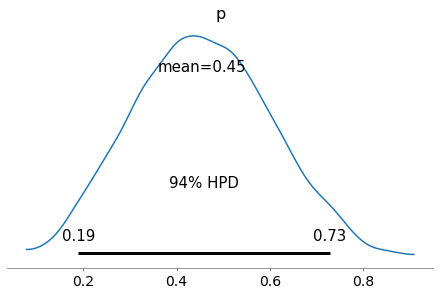

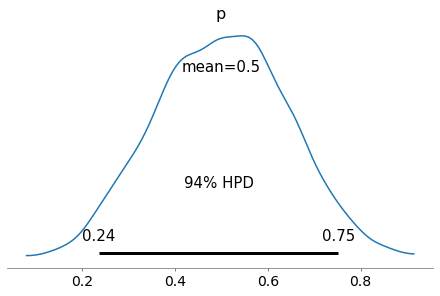

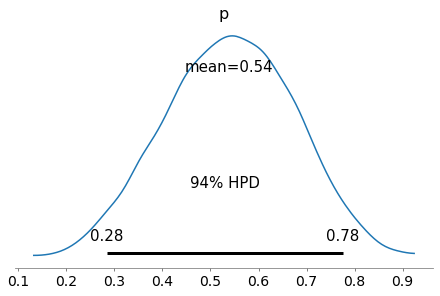

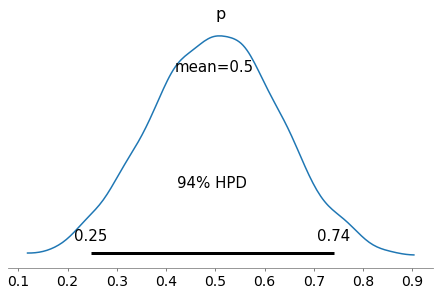

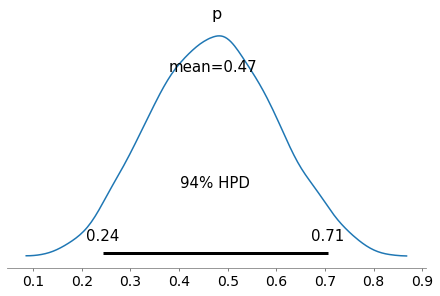

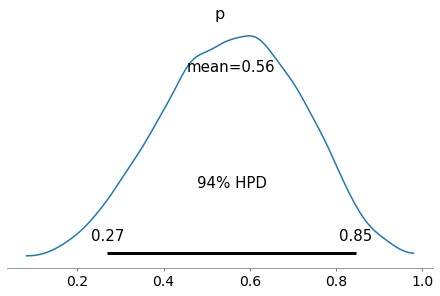

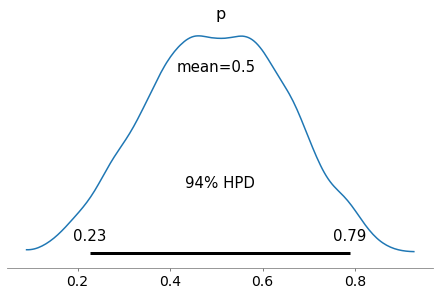

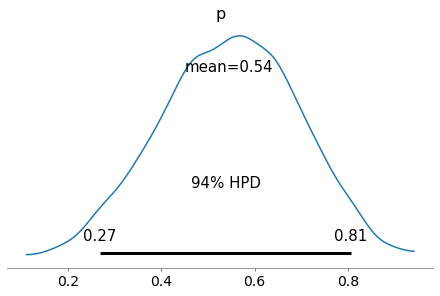

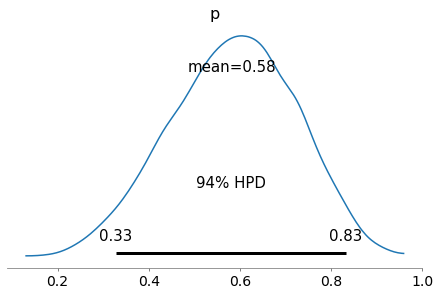

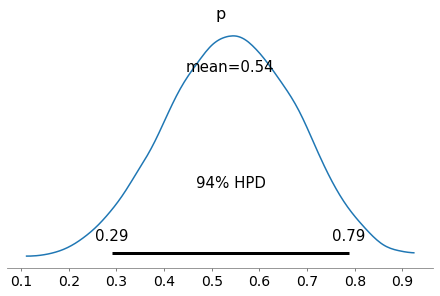

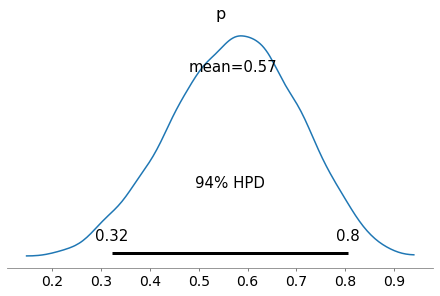

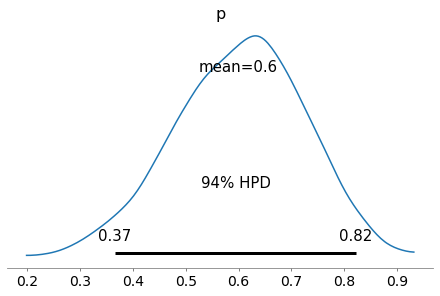

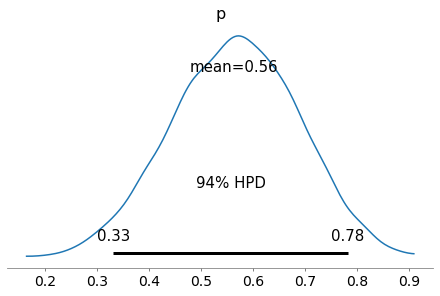

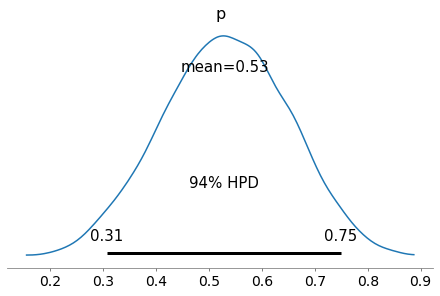

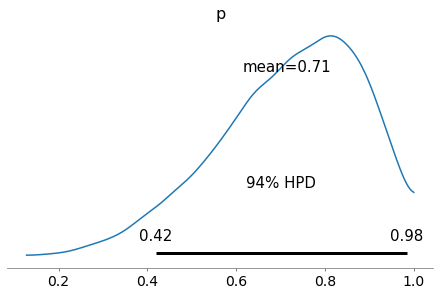

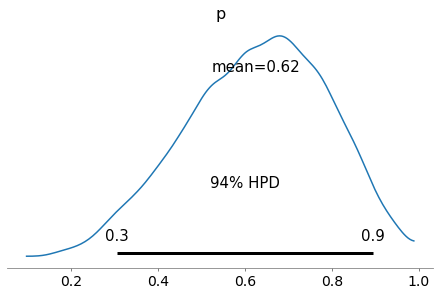

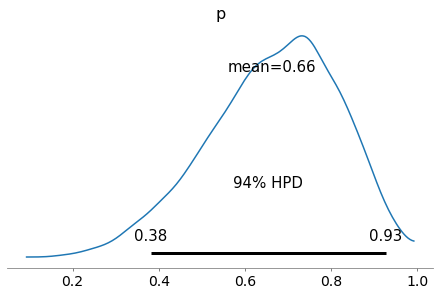

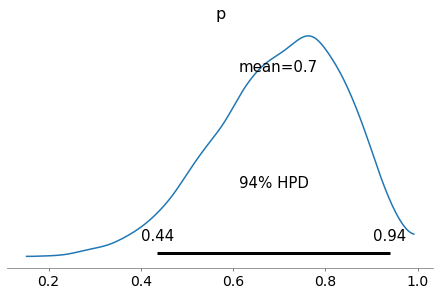

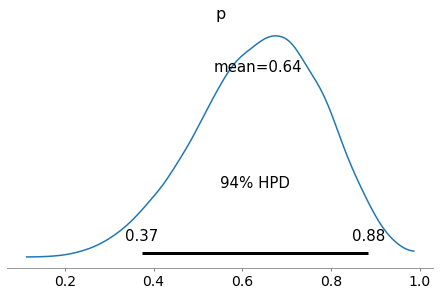

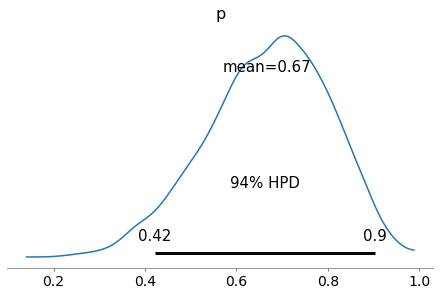

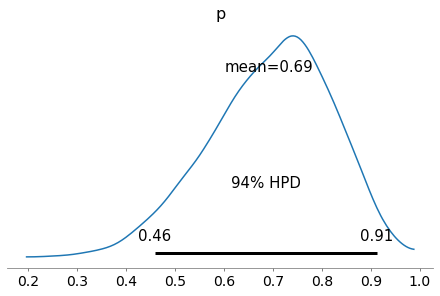

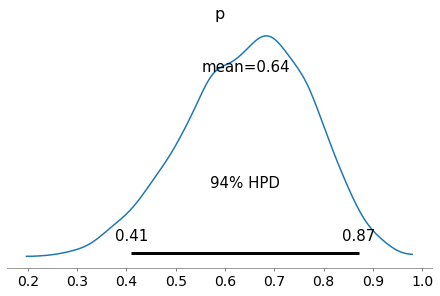

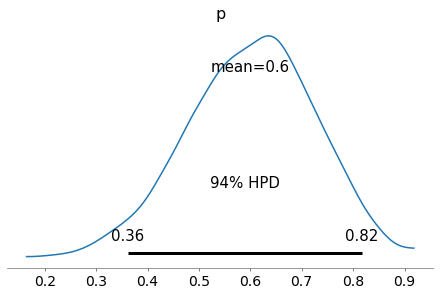

In [ ]:

for j in range(len(betas)):
  for i in range(len(size)):
    with pm.Model() as model :
      p= pm.Beta('p',alpha=alphas[j],beta=betas[j])
      likelihood = pm.Binomial("likelihood", p=p, observed=no_of_heads(i+1), n=i+1)
      step = pm.Metropolis()
      trace = pm.sample(10000, step=step, random_seed=1234)
      pm.plot_posterior(trace,var_names=['p'])


1(c)

In [ ]:
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)
    x = np.concatenate([[x[0] - 1 * width], x, [x[-1] + 1 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 6680.93it/s]
The number of effective samples is smaller than 25% for some parameters.


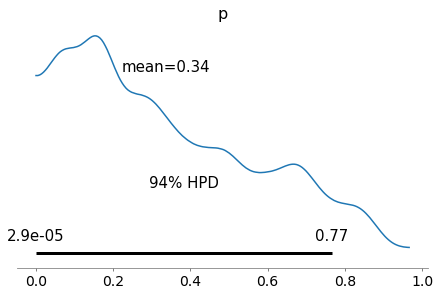

In [ ]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=1.0,beta=1.0)
    likelihood = pm.Binomial("likelihood", p=p, observed=no_of_heads(1) , n=1)
    step = pm.Metropolis()
    trace = pm.sample(1000, step=step, random_seed=1234)
    pm.plot_posterior(trace,var_names=['p'])

Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 4079.70it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 3959.44it/s]
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 3352.94it/s]
The number of effective samples is smaller than 25% for some parameters.


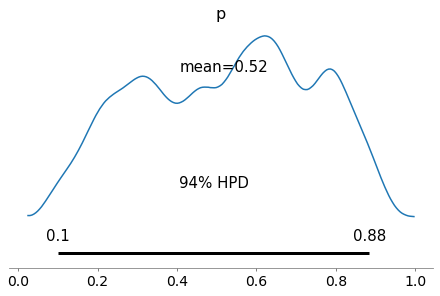

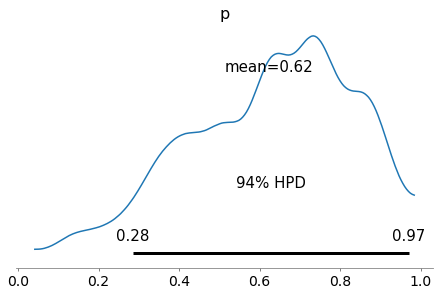

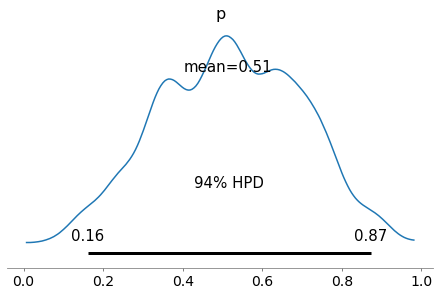

In [ ]:
for i in range(3):
    with pm.Model() as model:
        p = from_posterior("p", trace["p"])
        likelihood = pm.Binomial("likelihood", p=p, observed = A[i+1], n=1)
        step = pm.Metropolis()
        trace = pm.sample(1000,step = step)
        pm.plot_posterior(trace,var_names=['p']) 

Sequential sampling (2 chains in 1 job)
Metropolis: [p]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 5752.28it/s]
The number of effective samples is smaller than 25% for some parameters.


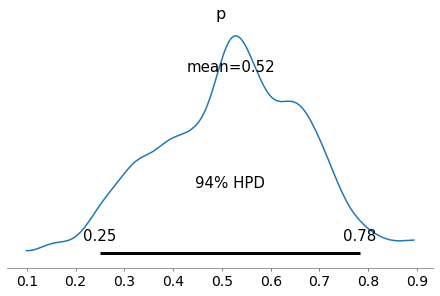

In [ ]:
#done at once
with pm.Model() as model:
        p = from_posterior("p", trace["p"])
        likelihood = pm.Binomial("likelihood", p=p, observed = no_of_heads(4), n=4)
        step = pm.Metropolis()
        trace = pm.sample(1000,step = step)
        pm.plot_posterior(trace,var_names=['p']) 